In [1]:
import src.utilidade as utilidade, src.zip as zip, src.video as video
import os, matplotlib.pyplot as plt, numpy as np
from tabulate import tabulate

# Virial 6.1: Choques, 500 corpos de massas iguais, raios em {0.02, 0.025, 0.03, 0.035, 0.04}

In [2]:
alvo = 'virial6.1'
destino = 'data/' + alvo
diretorio = destino + "/data"

In [3]:
zip.baixar_zip(f"https://www.ime.usp.br/~oapotalej/{alvo}.zip", f'{destino}.zip')
zip.descompactar(f'{destino}.zip', destino)
os.remove(destino + '.zip')

Arquivo salvo com data/virial6.1.zip
Extraído!


In [4]:
# Primeiro, vamos ler os arquivos
arquivos_antes = utilidade.ler_pastas_diretorio(diretorio)
densidades = list(arquivos_antes.keys())
densidades.sort()
arquivos = {dens: arquivos_antes[dens] for dens in densidades}

# Agora vamos calcular as informacoes das simulacoes
for densidade in arquivos:
    arquivo = arquivos[densidade]
    infos = utilidade.infos_simulacao(arquivo['pasta'])
    arquivo['infos'] = infos

Lendo a pasta 'data/virial6.1/data/20250813_001'... lido! (1.26s) informacoes calculadas! (3.49s)
Lendo a pasta 'data/virial6.1/data/20250814_001'... lido! (1.17s) informacoes calculadas! (3.39s)
Lendo a pasta 'data/virial6.1/data/20250814_002'... lido! (1.4s) informacoes calculadas! (3.3s)
Lendo a pasta 'data/virial6.1/data/20250814_003'... lido! (1.21s) informacoes calculadas! (3.31s)
Lendo a pasta 'data/virial6.1/data/20250815_001'... lido! (1.22s) informacoes calculadas! (3.9s)


In [5]:
tabela = []
for densidade in arquivos:
  infos = arquivos[densidade]['infos']
  tabela.append([densidade, infos['raio_meia_massa'][0], infos['tempo_dinamico'][0], infos['escapes'][0], infos['i0'], infos['inercia_central'][0]])
print(tabulate(tabela, headers=["Dens.", "RMH", "TD", "EJ(%)", "I0", "I0"]))

  Dens.       RMH        TD    EJ(%)        I0        I0
-------  --------  --------  -------  --------  --------
  0.02   0.951324  0.855446        0  0.839658  0.837309
  0.025  0.708817  0.738406        0  0.843076  0.840236
  0.03   0.697372  0.732421        0  0.841509  0.838796
  0.035  0.848458  0.807874        0  0.839264  0.836592
  0.04   0.731395  0.750075        0  0.840325  0.83947


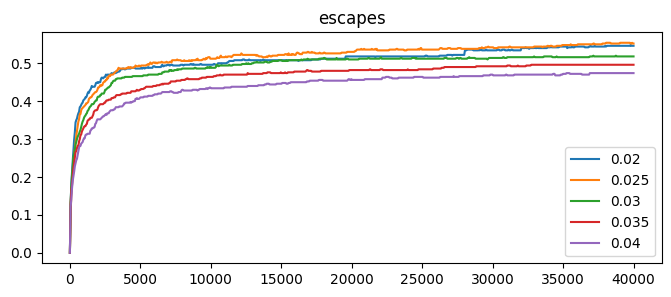

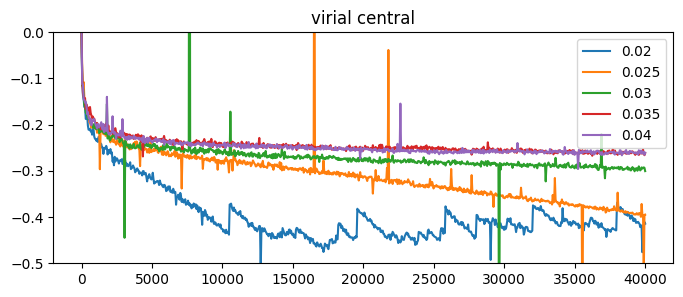

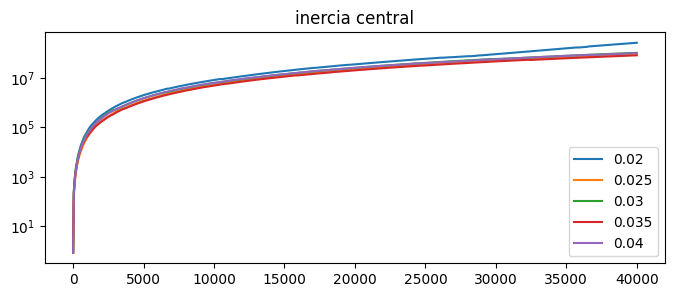

In [7]:
utilidade.fazer_figura(arquivos, 'escapes', 'escapes')

utilidade.fazer_figura(arquivos, 'virial_central', 'virial central', plotar=False)
plt.ylim(-0.5, 0)
plt.show()

utilidade.fazer_figura(arquivos, 'inercia_central', 'inercia central', plotar=False)
plt.yscale('log')
plt.show()

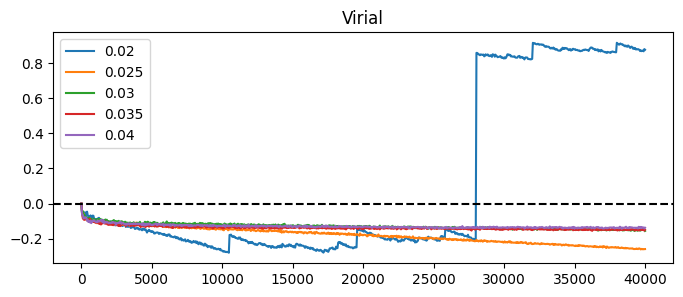

In [9]:
utilidade.fazer_figura(arquivos, 'virial', 'Virial', y_referencia=[0])

  Dens.    Coef. Ang.
-------  ------------
  0.025  -1.91153e-06
  0.03   -7.00591e-07
  0.035  -4.47199e-07
  0.04   -4.48792e-07


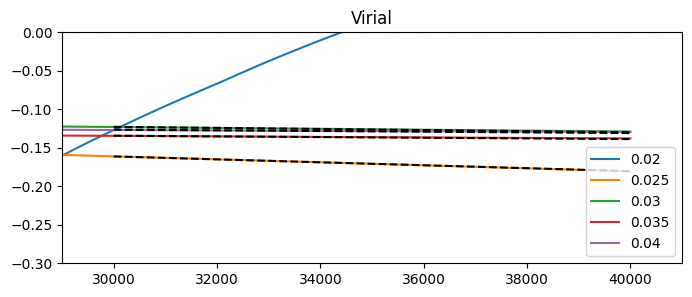

In [10]:
utilidade.fazer_figura(arquivos, 'virial_media', 'Virial', y_referencia=[0], plotar=False)
plt.ylim(-0.3, 0)

tabela = []
for densidade in arquivos:
  if float(densidade) == 0.02: continue
  ys = arquivos[densidade]['infos']['virial_media']
  xs = np.linspace(0, 40000, len(ys))

  x0 = 30000
  plt.xlim(x0-1e3, 41000)
  a, b = utilidade.reta_mmq_local(xs, ys, x0, k=int(x0 * 800/40000))

  xs = np.linspace(x0, 40000, 100)
  yx = (lambda x: a * x + b)(xs)
  plt.plot(xs, yx, c='black', linestyle='--')
  tabela.append([densidade, a])

print(tabulate(tabela, headers=["Dens.", "Coef. Ang."]))
plt.show()

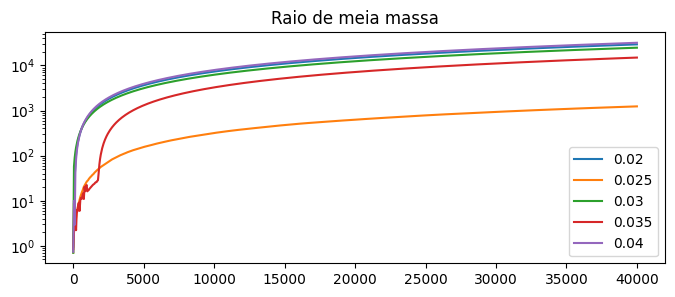

In [12]:
utilidade.fazer_figura(arquivos, 'raio_meia_massa', 'Raio de meia massa', plotar=False)
plt.yscale('log')
plt.show()